In [1]:
import seaborn as sns
import scanpy
import sys
sys.path.append('..')
from utils import *
from tqdm import tqdm
import pandas as pd
from sklearn import preprocessing

In [2]:
sns.set(font_scale=1.4)

In [3]:
adata_beta = scanpy.read_h5ad('../data/beta_run_2.h5ad')
adata_beta_obob = adata_beta[adata_beta.obs['samples'] == 'OB/OB']
adata_beta_obob = adata_beta_obob[adata_beta_obob.obs['TrajectoryNet_timepoints'] == 4] # just end of OB/OB trajectory
combined_pc_op = pd.read_pickle('results/combined_magic_pc_op.pkl')
cck_mask = adata_beta_obob[:, adata_beta_obob.var['names'].isin(['Cck'])].X.flatten() > 0

In [9]:
beta_cell_markers = ['Ins1', 'Ins2', 'Ucn3', 'Slc2a2', 'Slc30a8', 'Pdx1', 'Mafa', 'Nkx6-1', 'Rbp4', 'Aldh1a3', 'Cd81', 'Hspa5', 'Hsp90b1', 'Edem1', 'Pcsk1', 'Scg2', 'Scg3', 'Scg5', 'Chgb', 'Iapp', 'Cck']
cck_regulation = ['Jun', 'Fos', 'Crem', 'Usf1', 'Sp3', 'Atf1', 'Sp1', 'Usf2', 'Creb1', 'Max', 'Pdx1', 'Neurod1', 'Myc']

In [5]:
backwards_trajectories_to_obob2 = np.load('results/islet_run_combined_magic_pca_5_tp_run1_growth/backward_trajectories_OBOB_AT2.npy')
tnet_traj = pd.DataFrame(columns=beta_cell_markers)
for time in tqdm(range(100)):
    t = np.linspace(0, 4, 100)[::-1][time]

    tp = pd.DataFrame(combined_pc_op.inverse_transform(backwards_trajectories_to_obob2[time] * np.std(adata_beta.obsm['combined_magic_pc'][:, 0]))[:, adata_beta_obob.var['names'].isin(beta_cell_markers)],
                      columns=adata_beta_obob.var['names'][adata_beta_obob.var['names'].isin(beta_cell_markers)])

    tp['timepoint'] = t
    tnet_traj = pd.concat((tnet_traj, tp), ignore_index=True)
all_values_scaled_1 = pd.DataFrame(preprocessing.scale(tnet_traj.groupby('timepoint').mean()).T, index=beta_cell_markers)

100%|██████████| 100/100 [00:04<00:00, 22.79it/s]


In [6]:
# repeat for run 2
backwards_trajectories_to_obob2 = np.load('results/islet_run_combined_magic_pca_5_tp_run2_growth/backward_trajectories_OBOB_AT2.npy')
tnet_traj = pd.DataFrame(columns=beta_cell_markers)
for time in tqdm(range(100)):
    t = np.linspace(0, 4, 100)[::-1][time]

    tp = pd.DataFrame(combined_pc_op.inverse_transform(backwards_trajectories_to_obob2[time] * np.std(adata_beta.obsm['combined_magic_pc'][:, 0]))[:, adata_beta_obob.var['names'].isin(beta_cell_markers)],
                      columns=adata_beta_obob.var['names'][adata_beta_obob.var['names'].isin(beta_cell_markers)])

    tp['timepoint'] = t
    tnet_traj = pd.concat((tnet_traj, tp), ignore_index=True)
all_values_scaled_2 = pd.DataFrame(preprocessing.scale(tnet_traj.groupby('timepoint').mean()).T, index=beta_cell_markers)

100%|██████████| 100/100 [00:04<00:00, 22.68it/s]


In [7]:
# take mean of both runs
all_values_scaled = (all_values_scaled_1 + all_values_scaled_2)/2

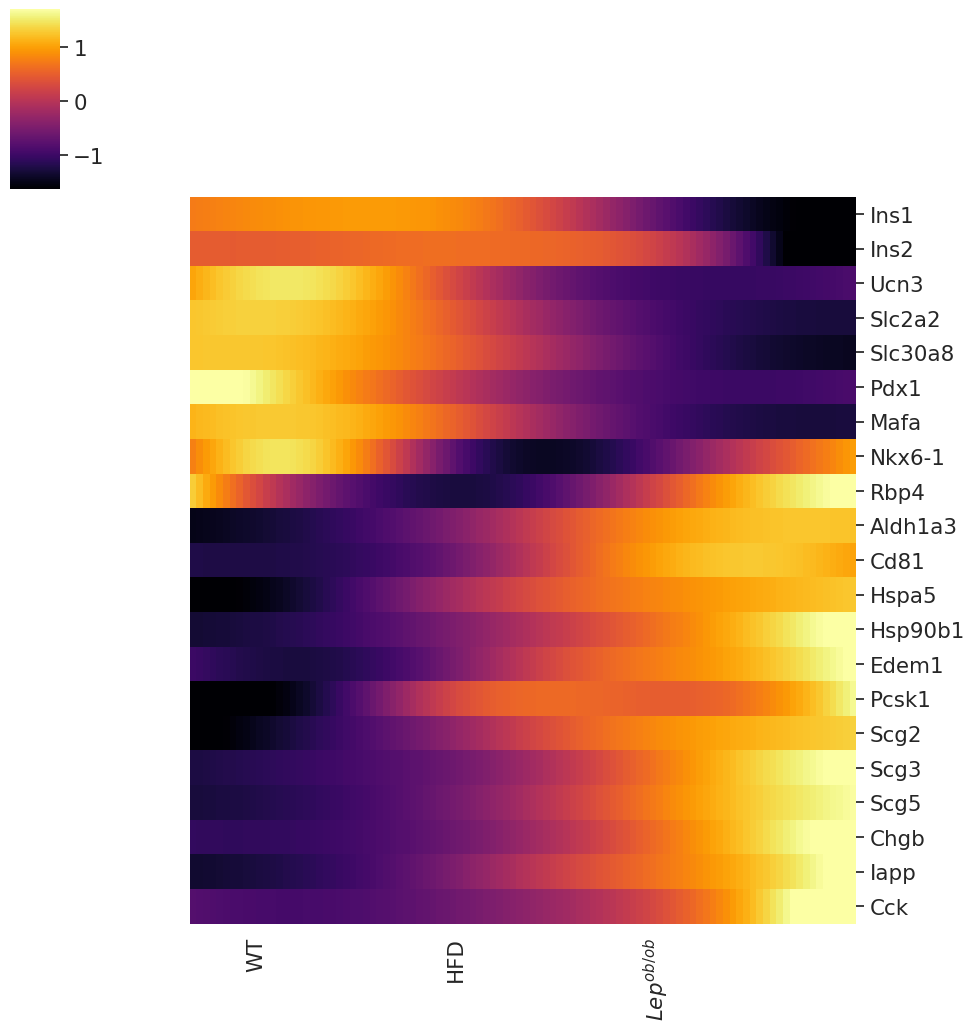

In [10]:
plot_heatmap(beta_cell_markers, all_values_scaled, savefig='figures/beta_cell_marker_heatmap.png')

### for putative cck regulators, get values to ob/ob at 2

In [46]:
backwards_trajectories_to_obob2 = np.load('results/islet_run_combined_magic_pca_5_tp_run1_growth/backward_trajectories_OBOB_AT2.npy')
tnet_traj = pd.DataFrame(columns=cck_regulation)
for time in tqdm(range(100)):
    t = np.linspace(0, 4, 100)[::-1][time]

    tp = pd.DataFrame(combined_pc_op.inverse_transform(backwards_trajectories_to_obob2[time] * np.std(adata_beta.obsm['combined_magic_pc'][:, 0]))[:, adata_beta_obob.var['names'].isin(cck_regulation)],
                      columns=adata_beta_obob.var['names'][adata_beta_obob.var['names'].isin(cck_regulation)])

    tp['timepoint'] = t
    tnet_traj = pd.concat((tnet_traj, tp), ignore_index=True)
all_values_scaled_1 = pd.DataFrame(preprocessing.scale(tnet_traj.groupby('timepoint').mean()).T, index=cck_regulation)

100%|██████████| 100/100 [00:04<00:00, 21.59it/s]


In [48]:
backwards_trajectories_to_obob2 = np.load('results/islet_run_combined_magic_pca_5_tp_run2_growth/backward_trajectories_OBOB_AT2.npy')
tnet_traj = pd.DataFrame(columns=cck_regulation)
for time in tqdm(range(100)):
    t = np.linspace(0, 4, 100)[::-1][time]

    tp = pd.DataFrame(combined_pc_op.inverse_transform(backwards_trajectories_to_obob2[time] * np.std(adata_beta.obsm['combined_magic_pc'][:, 0]))[:, adata_beta_obob.var['names'].isin(cck_regulation)],
                      columns=adata_beta_obob.var['names'][adata_beta_obob.var['names'].isin(cck_regulation)])

    tp['timepoint'] = t
    tnet_traj = pd.concat((tnet_traj, tp), ignore_index=True)
all_values_scaled_2 = pd.DataFrame(preprocessing.scale(tnet_traj.groupby('timepoint').mean()).T, index=cck_regulation)

100%|██████████| 100/100 [00:04<00:00, 22.41it/s]


In [49]:
# take mean of both runs
all_values_scaled = (all_values_scaled_1 + all_values_scaled_2)/2

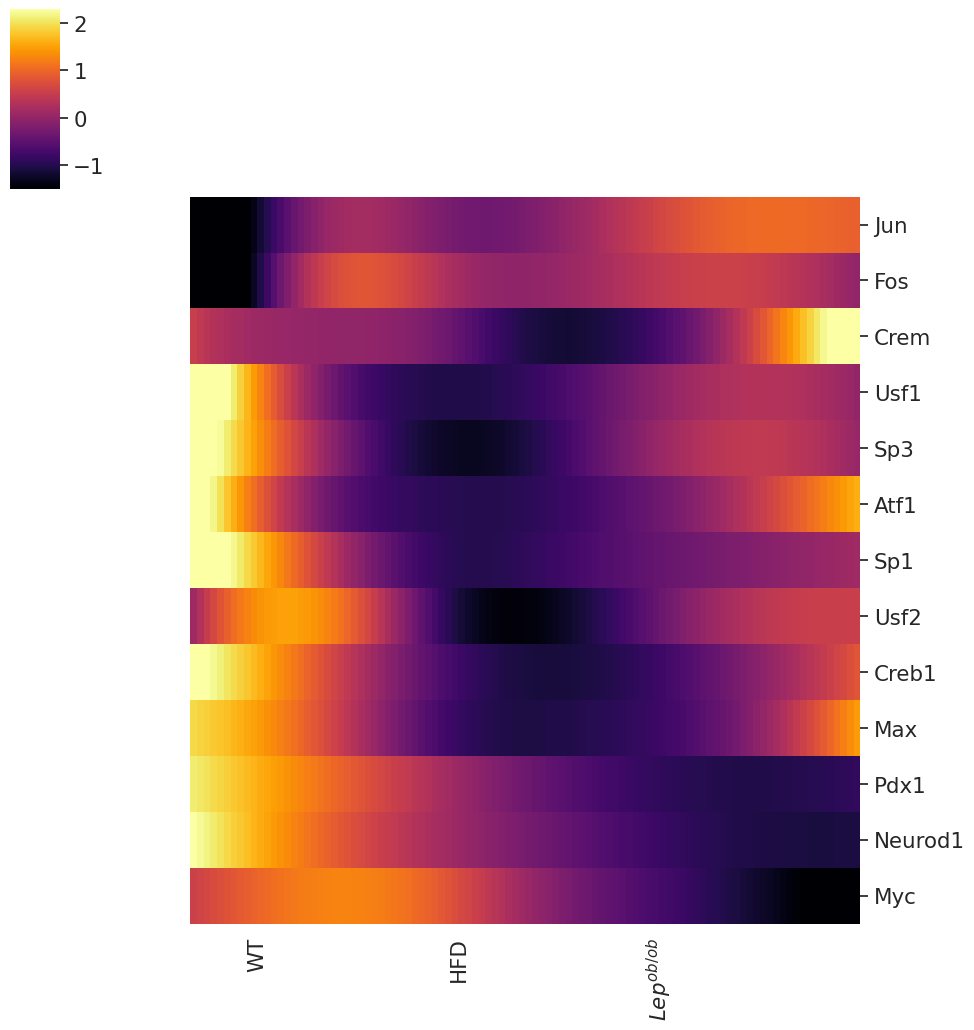

In [50]:
plot_heatmap(cck_regulation, all_values_scaled, savefig='figures/cck_regulation_marker_heatmap.png')